In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8a772294f14646e598b572136692c07a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EPe6G7pCXJHTniycoGyGXxKRnjb5apgJ7DLgoIyBEML0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8a772294f14646e598b572136692c07a.get_object(Bucket='salemodified-donotdelete-pr-yxd6hmqxumi8k4',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,week,quantity
0,2.0,49343
1,2.2,56205
2,2.4,47731
3,2.9,53525
4,3.1,49891


In [3]:
type(dataset)


pandas.core.frame.DataFrame

In [4]:
dataset

,week,quantity
0,2.0,49343
1,2.2,56205
2,2.4,47731
3,2.9,53525
4,3.1,49891
5,3.8,66642
6,3.9,70150
7,4.1,64445
8,4.1,74445
9,4.6,67189


In [5]:
dataset.head()

,week,quantity
0,2.0,49343
1,2.2,56205
2,2.4,47731
3,2.9,53525
4,3.1,49891


In [6]:
dataset.head(5)

,week,quantity
0,2.0,49343
1,2.2,56205
2,2.4,47731
3,2.9,53525
4,3.1,49891


In [7]:
x= dataset.iloc[:,:1]

In [8]:
x

,week
0,2.0
1,2.2
2,2.4
3,2.9
4,3.1
5,3.8
6,3.9
7,4.1
8,4.1
9,4.6


In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
x= dataset.iloc[:,:-1].values #convert from dataframe to numpy array

In [11]:
x

array([[ 2. ],
       [ 2.2],
       [ 2.4],
       [ 2.9],
       [ 3.1],
       [ 3.8],
       [ 3.9],
       [ 4.1],
       [ 4.1],
       [ 4.6],
       [ 4.8],
       [ 4.9],
       [ 4.9],
       [ 5. ],
       [ 5.4],
       [ 5.8],
       [ 6. ],
       [ 6.2],
       [ 6.8],
       [ 6.9],
       [ 7.7],
       [ 8. ],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.9],
       [10.4],
       [10.5],
       [11.2],
       [11.4]])

In [12]:
x.ndim #mandatory to be in 2 dimesion for Linear Regression

2

In [13]:
type(x)

numpy.ndarray

In [14]:
y= dataset.iloc[:,1:]

In [15]:
y

,quantity
0,49343
1,56205
2,47731
3,53525
4,49891
5,66642
6,70150
7,64445
8,74445
9,67189


In [16]:
y= dataset.iloc[:,1:].values

In [17]:
y

array([[ 49343],
       [ 56205],
       [ 47731],
       [ 53525],
       [ 49891],
       [ 66642],
       [ 70150],
       [ 64445],
       [ 74445],
       [ 67189],
       [ 73218],
       [ 65794],
       [ 66957],
       [ 67081],
       [ 71111],
       [ 77938],
       [ 76029],
       [ 93088],
       [ 91363],
       [103940],
       [101738],
       [108273],
       [111302],
       [123812],
       [119431],
       [115582],
       [126969],
       [122635],
       [132391],
       [131872]])

In [18]:
from sklearn.model_selection import train_test_split                #previously cros_validation was used in sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train

array([[10.5],
       [ 4.9],
       [ 6.2],
       [ 8.8],
       [ 3.8],
       [ 6. ],
       [ 4.1],
       [ 5.4],
       [ 9.1],
       [ 7.7],
       [ 2.2],
       [11.4],
       [ 3.9],
       [ 3.1],
       [ 6.8],
       [ 6.9],
       [ 4.6],
       [ 4.1],
       [ 9.9],
       [ 2.9],
       [ 2. ],
       [ 8. ],
       [ 5.8],
       [ 4.9]])

In [20]:
x_test

array([[ 2.4],
       [11.2],
       [ 5. ],
       [ 4.8],
       [10.4],
       [ 9.6]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_predict=lr.predict(x_test)

In [25]:
y_predict

array([[ 50748.96184072],
       [132699.62295594],
       [ 74961.65717022],
       [ 73099.14214487],
       [125249.56285456],
       [117799.50275317]])

In [26]:
y_test

array([[ 47731],
       [132391],
       [ 67081],
       [ 73218],
       [126969],
       [119431]])

In [27]:
lr.predict(np.array([[5]]))

array([[74961.65717022]])

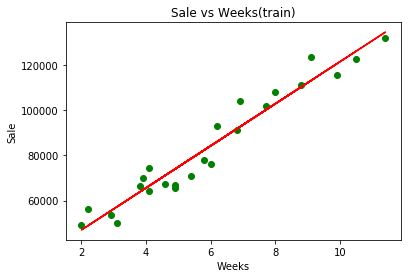

In [29]:
#visualization of train data
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train,lr.predict(x_train),color = 'Red')
plt.xlabel("Weeks")
plt.ylabel("Sale")
plt.title("Sale vs Weeks(train)")
plt.show()

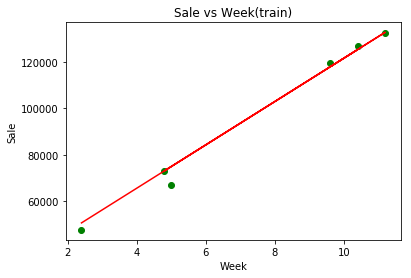

In [30]:
#visualization of train data
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_test,lr.predict(x_test),color = 'Red')
plt.xlabel("Week")
plt.ylabel("Sale")
plt.title("Sale vs Week(train)")
plt.show()

In [31]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [32]:
wml_credentials={
  "apikey": "YCkzpDJpzRgVYTWOSFplk_nRAY0K0ijsPAGrxIz522dE",
  "iam_apikey_description": "Auto-generated for key 4b258351-1d51-484d-acfe-8f9b17856996",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9d3622545b8849b1a3695e64438965e8::serviceid:ServiceId-d4cfe772-eeea-4ae3-aa1f-21c5efbb45e4",
  "instance_id": "97e4e2f9-22e1-47d5-aebb-5d33fd2dc2be",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [33]:
client = WatsonMachineLearningAPIClient(wml_credentials)


In [34]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'startups data',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Sakshee',
    client.repository.ModelMetaNames.NAME:"Multilinear",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

In [35]:
model_details=client.repository.store_model(lr,meta_props=metadata)

In [37]:
model_details=client.repository.store_model(lr,meta_props=metadata)

In [39]:
published_model_uid=client.repository.get_model_uid(model_details)

In [40]:
published_model_uid

'aac917d4-38bc-4b60-af90-21fde7a5d3c5'

In [41]:
created_deployment=client.deployments.create(published_model_uid,name="MLR")



#######################################################################################

Synchronous deployment creation for uid: 'aac917d4-38bc-4b60-af90-21fde7a5d3c5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='61b1470d-7f46-492d-b094-f5c258717e00'
------------------------------------------------------------------------------------------------




In [42]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/97e4e2f9-22e1-47d5-aebb-5d33fd2dc2be/deployments/61b1470d-7f46-492d-b094-f5c258717e00/online'

In [43]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
61b1470d-7f46-492d-b094-f5c258717e00  MLR   online  DEPLOY_SUCCESS  2020-07-16T09:32:01.051Z  scikit-learn-0.20  model
34f2cb63-9a95-4bbe-9393-0e208efedc02  MLR   online  DEPLOY_SUCCESS  2020-07-16T05:54:40.949Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
